# Machine Learning - Final Project

Group 6:
- Mohammad Nizar Riswanda (21083010015)
- Meisya Vira Amelia (21083010018)
- Rheinka Elyana Suprapto (21083010021)
- Edina Alana Nabila (21083010022)

We used this dataset for our final project. We only used the dataset on year 2019 (satisfaction.xlsx). There's 3 algorithm that we used, XGBoost, Support Vector Machine (SVM), and Random Forest. Our goal is to find the best model algorithm from these 3 algorithms.

# Import Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import os

# Import Dataset

The original dataset is in xlsx format, so we changed it to csv first before we imported it (we convert it externally).

In [2]:
df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/satisfaction.csv')
df

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,119211,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,...,1,3,2,3,3,1,2,1,174,172.0
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,...,2,4,4,3,4,2,3,2,155,163.0
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,...,2,3,3,2,3,2,1,2,193,205.0


# Pre Processing

In [3]:
#check dataset's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [4]:
#check columns value
for col in df:
    print(df[col].value_counts())

11112     1
45159     1
19577     1
52464     1
15684     1
         ..
85453     1
121696    1
53922     1
34063     1
84566     1
Name: id, Length: 129880, dtype: int64
satisfied                  71087
neutral or dissatisfied    58793
Name: satisfaction_v2, dtype: int64
Female    65899
Male      63981
Name: Gender, dtype: int64
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: Age, Length: 75, dtype: int64
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
1963    92
1812    88
1639    87
1981    86
1789    86
        ..
4222     1
5049     1
5378     1
5613     1
4260     1
Name: Flight Distance, Length: 5398, dtype: int64
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: Seat comfort,

In [5]:
#drop [id] columns because it's not necessary
df.drop(['id'], axis=1, inplace=True)

In [6]:
#rename columns title
df = df.rename(columns={'satisfaction_v2':'satisfaction', 'Gender':'gender', 'Customer Type':'customer_type',
                        'Age':'age', 'Type of Travel':'travel_type', 'Class':'class', 'Flight Distance':'distance',
                        'Seat comfort':'seat_comfort', 'Departure/Arrival time convenient':'dep_val_time_convenient',
                        'Food and drink':'food_drink', 'Gate location':'gate','Inflight wifi service':'wifi_service',
                        'Inflight entertainment':'entertainment','Online support':'online_support',
                        'Ease of Online booking':'online_booking_service','On-board service':'onboard_service',
                        'Leg room service':'leg_room_service','Baggage handling':'baggage_handling',
                        'Checkin service':'checkin_service','Cleanliness':'cleanliness','Online boarding':'online_boarding',
                        'Departure Delay in Minutes':'departure_delay_minutes','Arrival Delay in Minutes':'arrival_delay_minutes'})
#show the columns title
df.columns

Index(['satisfaction', 'gender', 'customer_type', 'age', 'travel_type',
       'class', 'distance', 'seat_comfort', 'dep_val_time_convenient',
       'food_drink', 'gate', 'wifi_service', 'entertainment', 'online_support',
       'online_booking_service', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_minutes', 'arrival_delay_minutes'],
      dtype='object')

In [7]:
#check the missing value
df.isna().sum().sort_values(ascending=False)

arrival_delay_minutes      393
entertainment                0
departure_delay_minutes      0
online_boarding              0
cleanliness                  0
checkin_service              0
baggage_handling             0
leg_room_service             0
onboard_service              0
online_booking_service       0
online_support               0
satisfaction                 0
gender                       0
gate                         0
food_drink                   0
dep_val_time_convenient      0
seat_comfort                 0
distance                     0
class                        0
travel_type                  0
age                          0
customer_type                0
wifi_service                 0
dtype: int64

In [8]:
#drop the missing value
df = df.dropna(axis=0)

In [9]:
#check the shape of the dataset after removing missing values
df.shape

(129487, 23)

In [10]:
#handle duplication of data
df.drop_duplicates(keep = 'first', inplace = True)

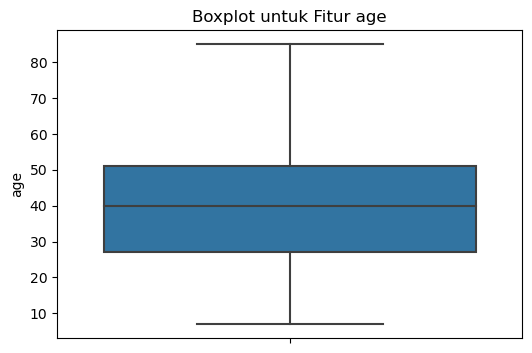

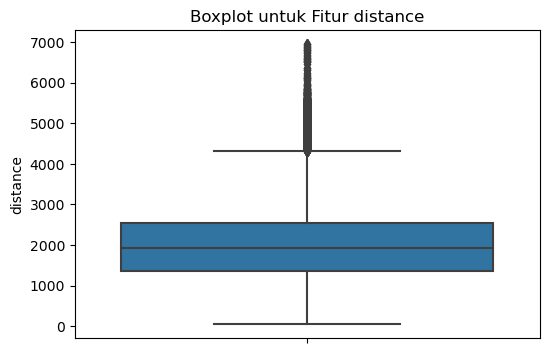

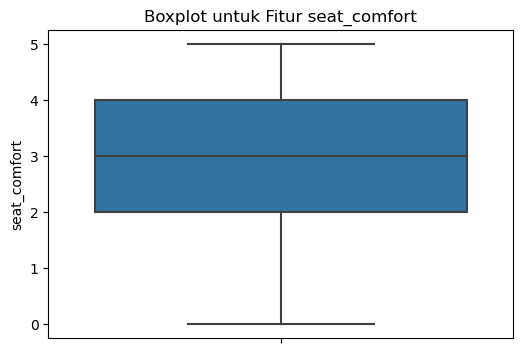

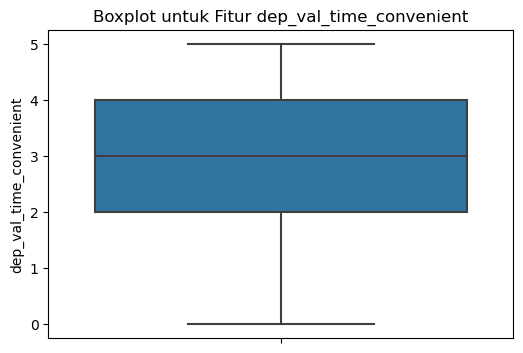

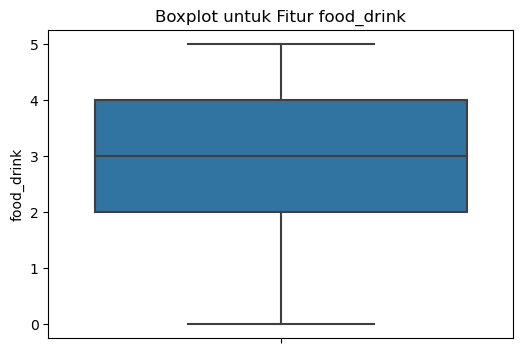

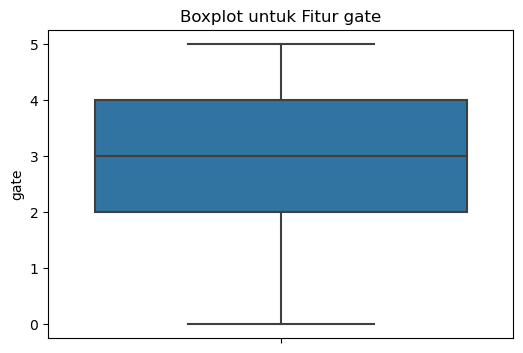

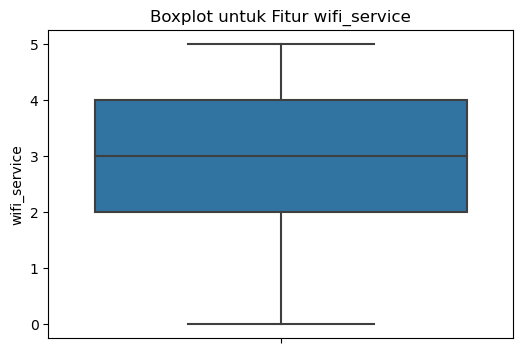

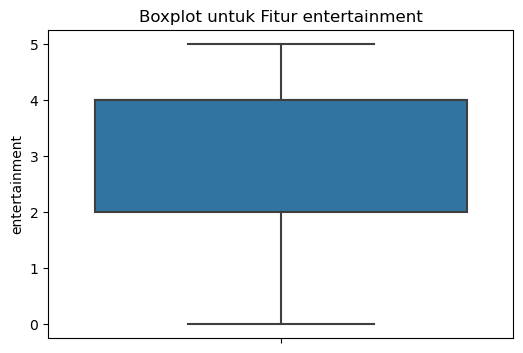

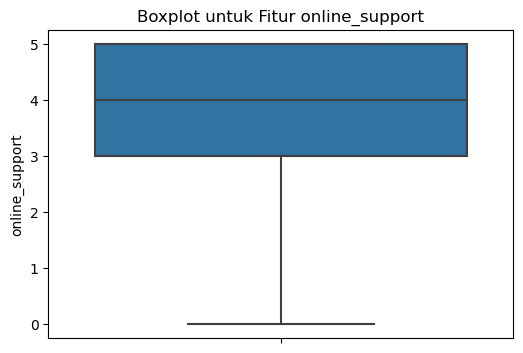

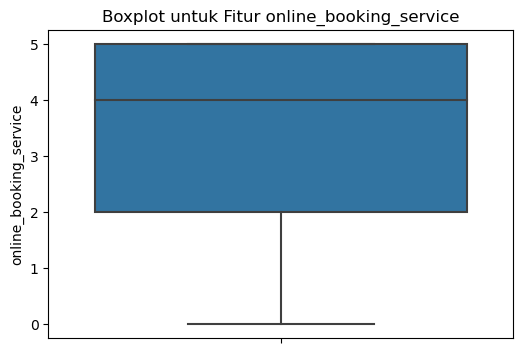

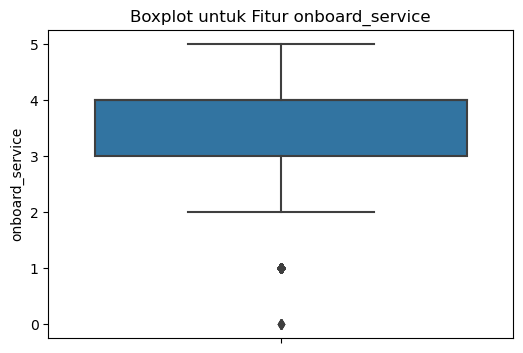

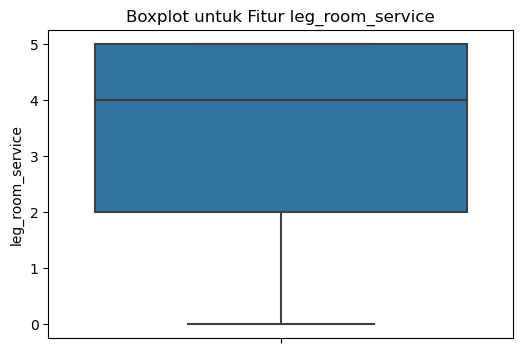

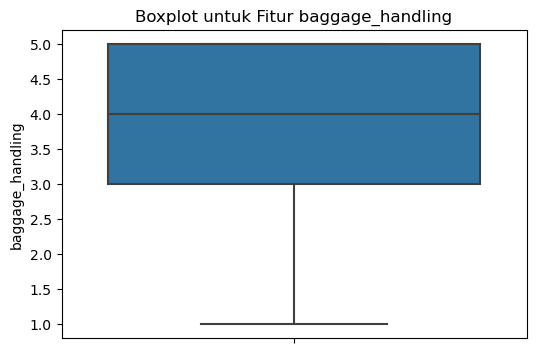

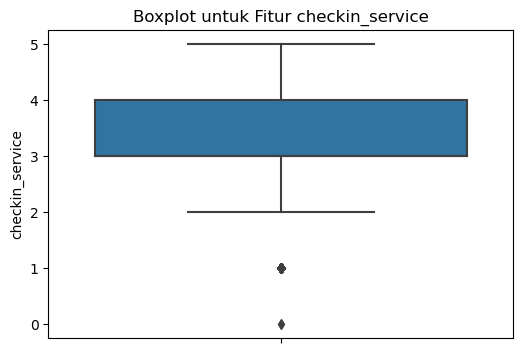

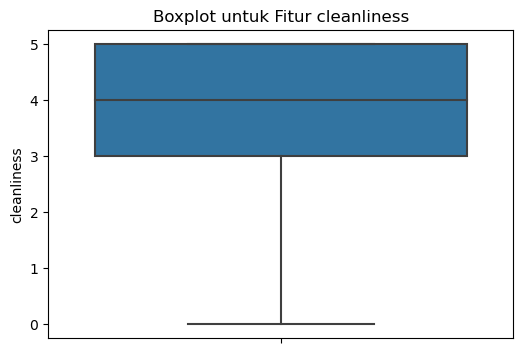

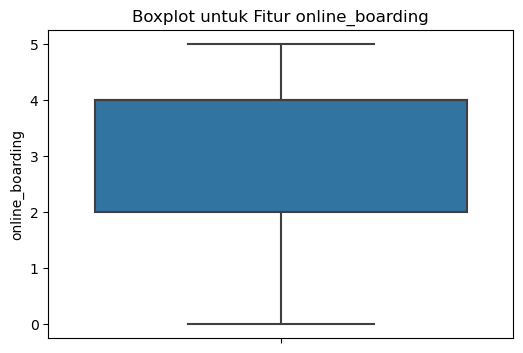

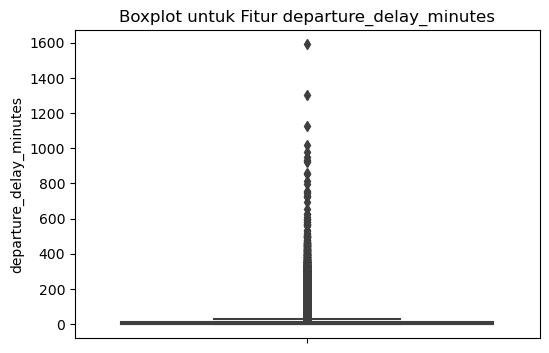

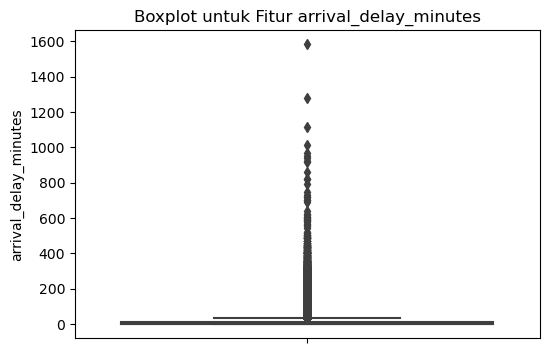

In [11]:
#detect outlier data
#list of columns to be checked
fitur = ['age', 'distance', 'seat_comfort', 'dep_val_time_convenient', 'food_drink', 'gate', 'wifi_service', 'entertainment', 'online_support', 'online_booking_service', 'onboard_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding', 'departure_delay_minutes', 'arrival_delay_minutes']

#loop through the selected columns
for col in fitur:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot untuk Fitur {col}')
    plt.ylabel(col)
    plt.show()

In [12]:
#create a function to count the number of outliers
def count_outliers_iqr(data, column, threshold=1.5):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers.sum()

In [13]:
#list of columns to check
kolom = ['distance','arrival_delay_minutes','departure_delay_minutes']

#count the number of outliers in columns using the IQR method
outlier_kolom = count_outliers_iqr(df, kolom)
print("{}".format(outlier_kolom))

distance                   12962
arrival_delay_minutes          0
departure_delay_minutes        0
dtype: int64


**From the outlier detection results above, it can be seen:**
- There are quite a lot of outliers in the 3 columns, namely distance, arrival delay, and departure delay
- We maintain these outliers because if they are deleted or filled in they do not represent the actual data

# EDA

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
distance,129487.0,1981.008974,1026.884131,50.0,1359.0,1924.0,2543.0,6951.0
seat_comfort,129487.0,2.838586,1.392873,0.0,2.0,3.0,4.0,5.0
dep_val_time_convenient,129487.0,2.990277,1.527183,0.0,2.0,3.0,4.0,5.0
food_drink,129487.0,2.852024,1.443587,0.0,2.0,3.0,4.0,5.0
gate,129487.0,2.990377,1.305917,0.0,2.0,3.0,4.0,5.0
wifi_service,129487.0,3.249160,1.318765,0.0,2.0,3.0,4.0,5.0
entertainment,129487.0,3.383745,1.345959,0.0,2.0,4.0,4.0,5.0
online_support,129487.0,3.519967,1.306326,0.0,3.0,4.0,5.0,5.0
online_booking_service,129487.0,3.472171,1.305573,0.0,2.0,4.0,5.0,5.0


In [15]:
df.describe(exclude = ['float', 'int64'])

,satisfaction,gender,customer_type,travel_type,class
count,129487,129487,129487,129487,129487
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,70882,65703,105773,89445,61990


**From the results of the analysis above can be seen:**
- The average delay/delay for departing and arriving flights is 15 minutes
- The median of the delays/delays is 0, meaning that 50% of the flights in this data do not experience delays/delays

## Visualization

### Split data according to type

In [16]:
#category features
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Jumlah variabel kategori: ', len(cat_features))
print('Nama kolom variabel kategori:',cat_features)

Jumlah variabel kategori:  5
Nama kolom variabel kategori: ['satisfaction', 'gender', 'customer_type', 'travel_type', 'class']


In [17]:
#numerical features
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Jumlah variabel numerik: ', len(num_features))
print('Kolom Variabel Numerik: ',num_features)

Jumlah variabel numerik:  18
Kolom Variabel Numerik:  ['age', 'distance', 'seat_comfort', 'dep_val_time_convenient', 'food_drink', 'gate', 'wifi_service', 'entertainment', 'online_support', 'online_booking_service', 'onboard_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding', 'departure_delay_minutes', 'arrival_delay_minutes']


### Category Data Type Visualization

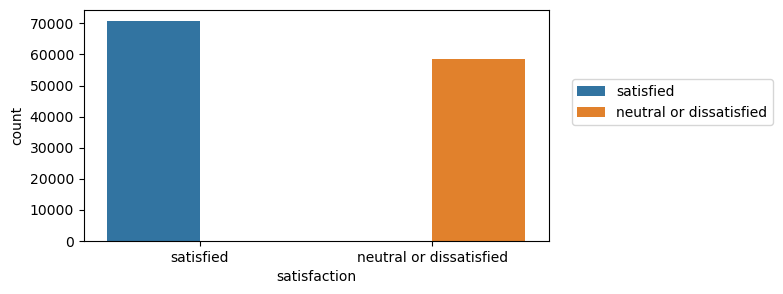

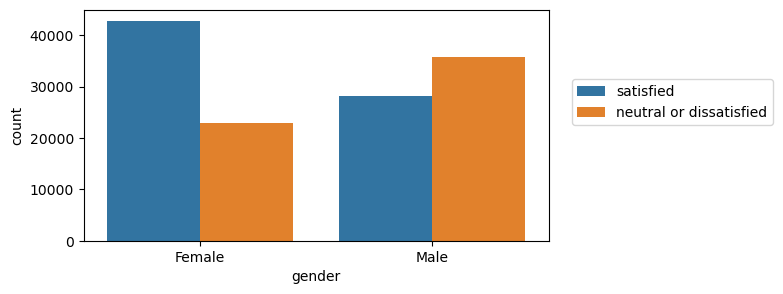

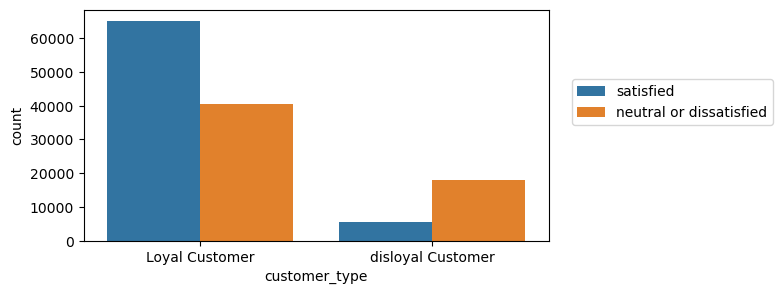

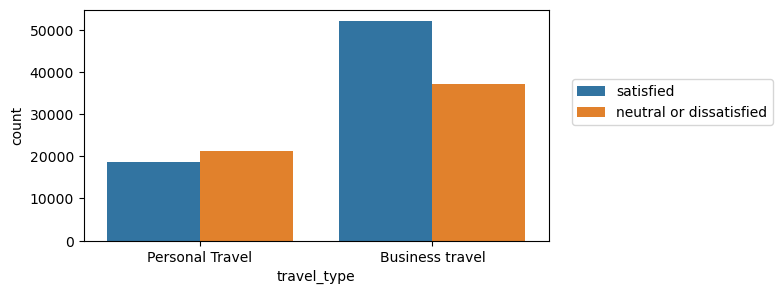

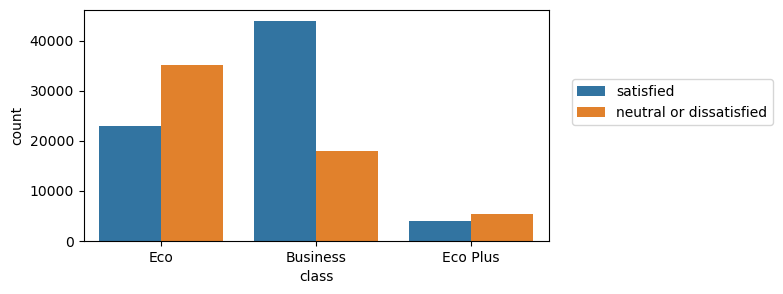

In [18]:
for col in cat_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='satisfaction')
    plt.legend(loc=(1.05,0.5))

In [19]:
for cols in cat_features:
        cat_group = df.groupby(cols)['satisfaction'].describe()
        percent = 100 *(cat_group['freq']/cat_group['count'])
        print('*'*65)
        print("Insights from '{}' data".format(cols))
        for i in range(0,(len(cat_group))):
            print('{} from {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
        print('*'*65)

*****************************************************************
Insights from 'satisfaction' data
100.0 from neutral or dissatisfied are neutral or dissatisfied
100.0 from satisfied are satisfied
*****************************************************************
*****************************************************************
Insights from 'gender' data
65.14 from Female are satisfied
55.97 from Male are neutral or dissatisfied
*****************************************************************
*****************************************************************
Insights from 'customer_type' data
61.64 from Loyal Customer are satisfied
76.01 from disloyal Customer are neutral or dissatisfied
*****************************************************************
*****************************************************************
Insights from 'travel_type' data
58.37 from Business travel are satisfied
53.36 from Personal Travel are neutral or dissatisfied
*****************************************

**From the results of the visualization and insight above, it can be seen that:**
- 'gender' does not have a significant difference so it does not really affect 'satisfaction'.
- The number of loyal customers at this airline is quite high and many of them are satisfied, even so, almost half of loyal customers are also neutral or dissatisfied.
- Customers traveling for business were more satisfied than those traveling for personal use, however the level of dissatisfaction, for both personal and private travel, was also very high.
- Passengers in business class seem to be more satisfied than those in economy class.

### Numerical Data Type Visualization

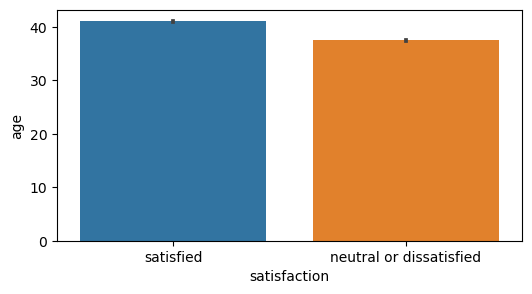

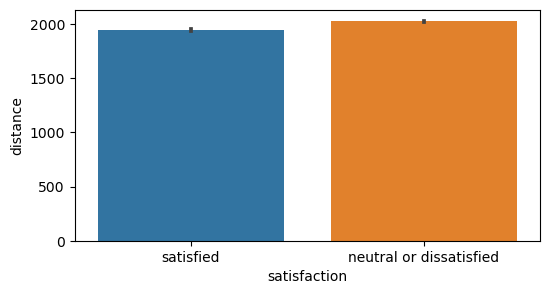

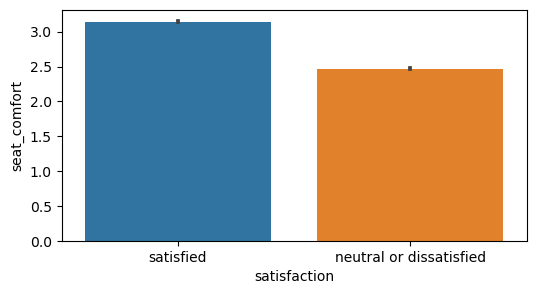

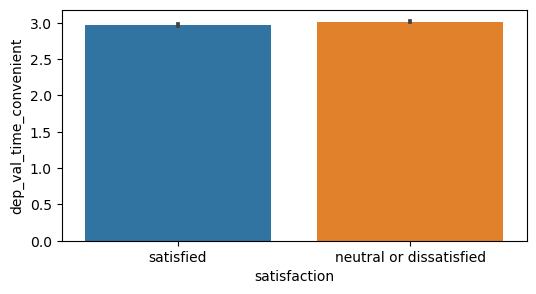

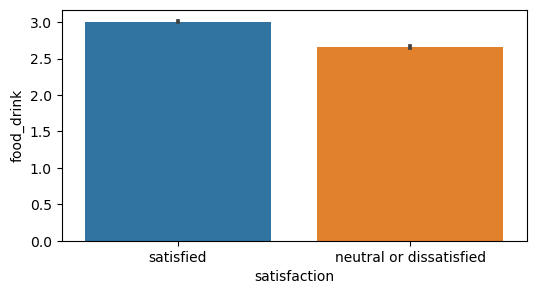

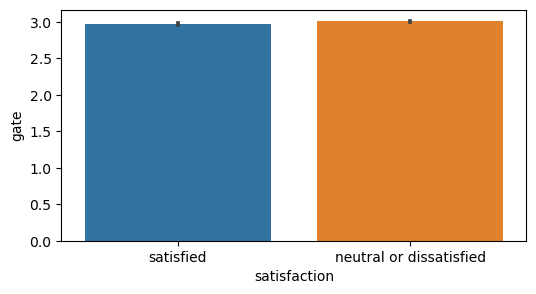

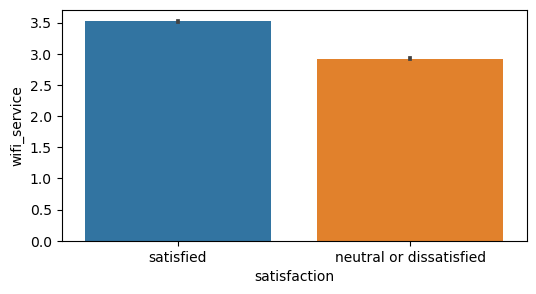

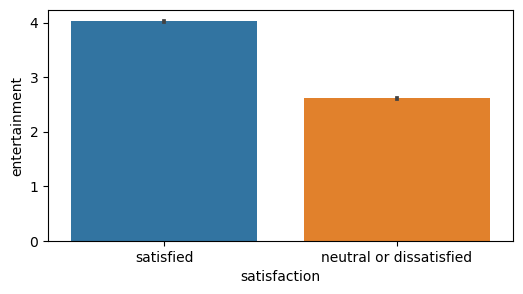

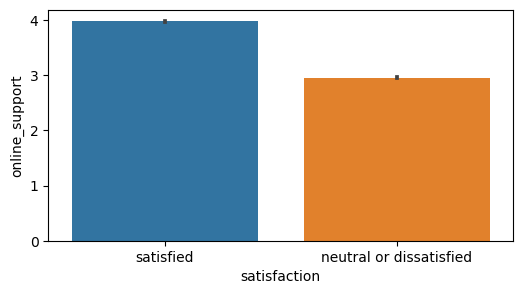

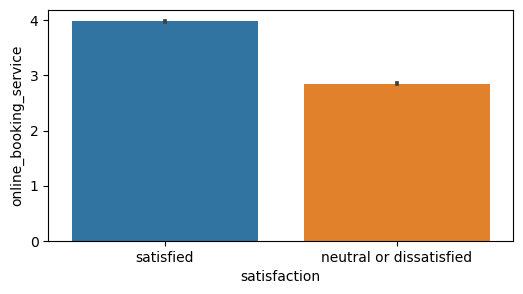

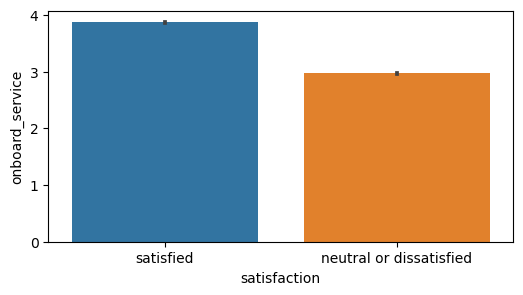

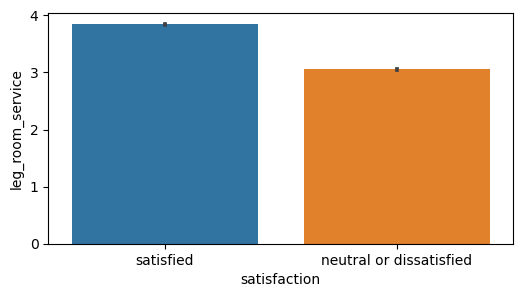

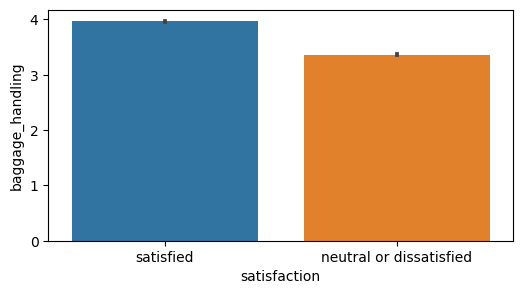

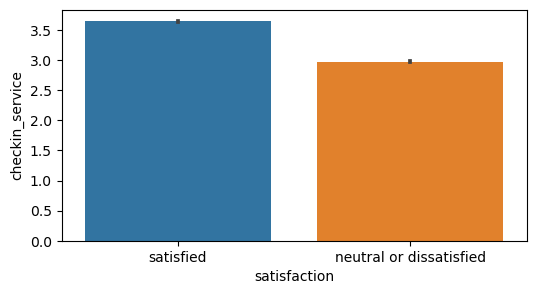

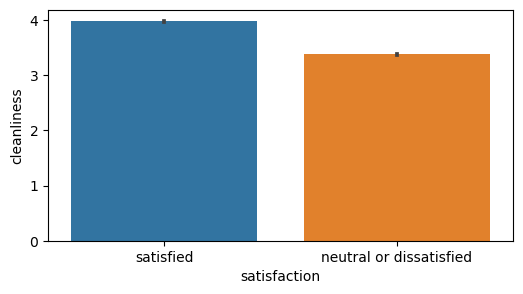

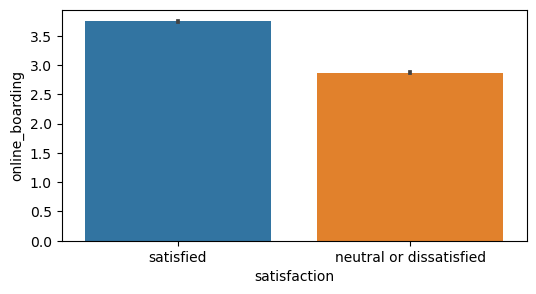

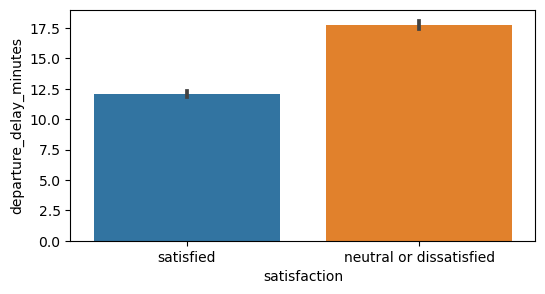

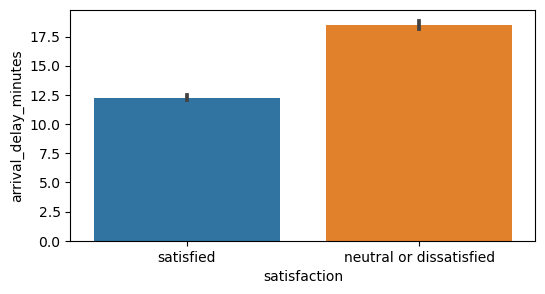

In [20]:
for col in num_features:
    plt.figure(figsize=(6,3))
    sns.barplot(data=df,x='satisfaction',y=col)

From the results of the plot above, it can be seen that age and gate location do not significantly affect flight satisfaction. Gender and corresponding arrival/departure times also do not provide as much information as in the previous plot. Therefore, these features will be removed.

In [21]:
#drop unnecessary value
df.drop(['age','gender','gate','dep_val_time_convenient'], axis=1, inplace=True)

In [22]:
#check the shape of the dataset after removing columns
df.shape

(129487, 19)

<Axes: xlabel='arrival_delay_minutes', ylabel='departure_delay_minutes'>

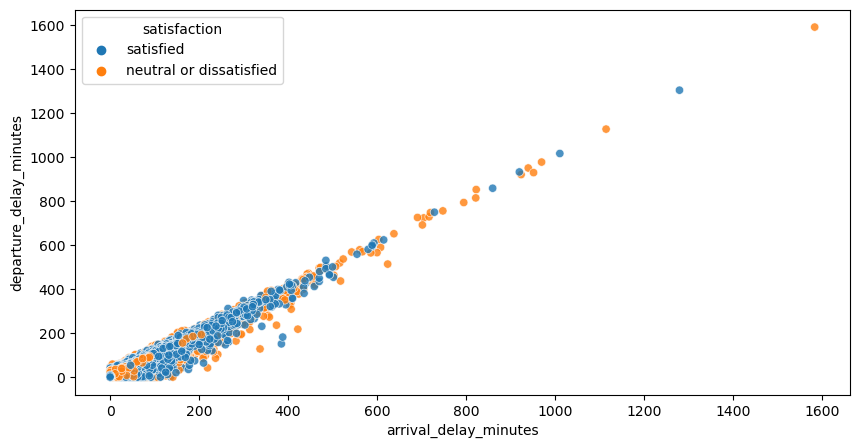

In [23]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='arrival_delay_minutes',y='departure_delay_minutes',hue='satisfaction', alpha=0.8)

Arrival and departure delays have a linear relationship.

(0.0, 1000.0)

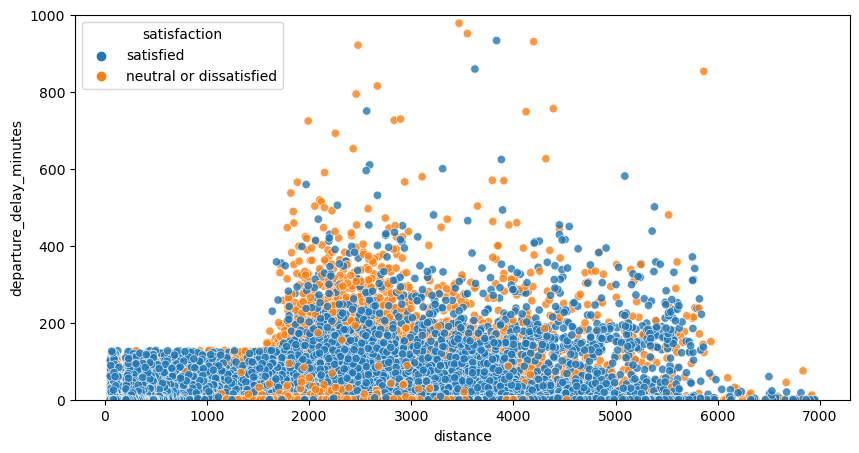

In [24]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='distance',y='departure_delay_minutes',hue='satisfaction', alpha=0.8)
plt.ylim(0,1000)

The longer the flight distance, most passengers don't mind a short delay in departure, while those with shorter flights are less satisfied. From this it can be seen that the delay in departure is not a factor of satisfaction.

From the results above, it can be seen that the average business class passenger gives a high rating to all services compared to eco and eco plus class. So the class of trip (class) has a major influence in determining passenger satisfaction.

# Mapping

In [25]:
#mapping the variables in categorical features into numeric
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['customer_type'] = df['customer_type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['travel_type'] = df['travel_type'].map({'Personal Travel':0, 'Business travel':1})
df['class'] = df['class'].map({'Eco':0, 'Eco Plus':1, 'Business':2})

# Create Algorithm Models

In [26]:
#split the data into target and attribute variables
target = 'satisfaction'
X = df.drop('satisfaction', axis=1)
y = df[target]

## Rasio 90:10

In [27]:
#train-Test Split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.1, random_state=42)

In [30]:
#feature scaling with pipeline methods, and standard scalers
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train_1 = pipeline.fit_transform(X_train_1)
scaled_X_test_1 = pipeline.transform(X_test_1)

In [31]:
print("Jumlah data training:", len(X_train_1))
print("Jumlah data testing:", len(X_test_1))

Jumlah data training: 116538
Jumlah data testing: 12949


### XGBoost

In [32]:
model_xgb_1 = XGBClassifier(random_state =2)
model_xgb_1.fit(scaled_X_train_1,y_train_1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [33]:
pred_xgb_1 = model_xgb_1.predict(scaled_X_test_1)
accuracy_score(y_test_1,pred_xgb_1)

0.9497258475557958

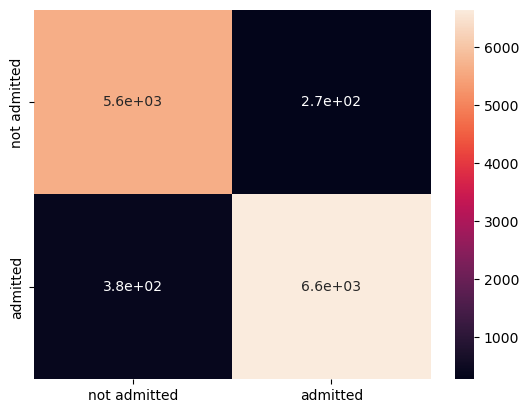

<Figure size 500x500 with 0 Axes>

In [34]:
#Rasio 90:10
conf_matrix_xgb_1 = confusion_matrix(y_test_1, pred_xgb_1)
sns.heatmap(conf_matrix_xgb_1, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [35]:
#calculating confusion matrix
TP = conf_matrix_xgb_1[1, 1]
FP = conf_matrix_xgb_1[0, 1]
TN = conf_matrix_xgb_1[0, 0]
FN = conf_matrix_xgb_1[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

#print confusion matrix's value
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 6650
FP: 274
TN: 5648
FN: 377
Accuracy: 0.9497258475557958
Precision: 0.9604274985557482
Recall: 0.9463497936530525
F1 Score: 0.95333667837431


In [36]:
err_train_xgb_1 = np.mean(y_train_1 != model_xgb_1.predict(scaled_X_train_1))
err_test_xgb_1 = np.mean(y_test_1 != model_xgb_1.predict(scaled_X_test_1))

print('Kesalahan pada data training: ', err_train_xgb_1)
print('Kesalahan pada data testing: ', err_test_xgb_1)

Kesalahan pada data training:  0.038579690744649814
Kesalahan pada data testing:  0.05027415244420418


### SVM

In [39]:
model_svm_1 = SVC(random_state =2)
model_svm_1.fit(scaled_X_train_1,y_train_1)

SVC(random_state=2)

In [41]:
pred_svm_1 = model_svm_1.predict(scaled_X_test_1)
accuracy_score(y_test_1,pred_svm_1)

0.9406131747625299

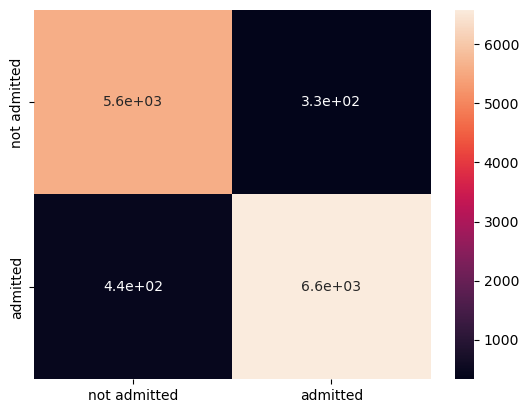

<Figure size 500x500 with 0 Axes>

In [42]:
#Rasio 90:10
conf_matrix_svm_1 = confusion_matrix(y_test_1, pred_svm_1)
sns.heatmap(conf_matrix_svm_1, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [43]:
#calculating confusion matrix
TP = conf_matrix_svm_1[1, 1]
FP = conf_matrix_svm_1[0, 1]
TN = conf_matrix_svm_1[0, 0]
FN = conf_matrix_svm_1[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

#print confusion matrix's value
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 6587
FP: 329
TN: 5593
FN: 440
Accuracy: 0.9406131747625299
Precision: 0.9524291497975709
Recall: 0.9373843745552868
F1 Score: 0.9448468765688876


In [44]:
err_train_svm_1 = np.mean(y_train_1 != model_svm_1.predict(scaled_X_train_1))
err_test_svm_1 = np.mean(y_test_1 != model_svm_1.predict(scaled_X_test_1))

print('Kesalahan pada data training: ', err_train_svm_1)
print('Kesalahan pada data testing: ', err_test_svm_1)

Kesalahan pada data training:  0.05683982906862998
Kesalahan pada data testing:  0.059386825237470076


### Random Forest

In [45]:
model_rf_1 = RandomForestClassifier(random_state =2)
model_rf_1.fit(scaled_X_train_1,y_train_1)

RandomForestClassifier(random_state=2)

In [46]:
pred_rf_1 = model_rf_1.predict(scaled_X_test_1)
accuracy_score(y_test_1,pred_rf_1)

0.9508842381651093

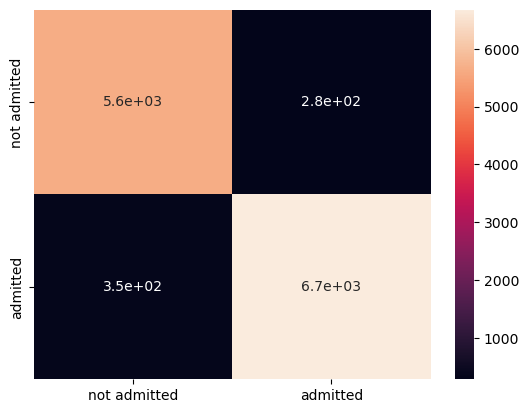

<Figure size 500x500 with 0 Axes>

In [47]:
#Rasio 90:10
conf_matrix_rf_1 = confusion_matrix(y_test_1, pred_rf_1)
sns.heatmap(conf_matrix_rf_1, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [48]:
#calculating confusion matrix
TP = conf_matrix_rf_1[1, 1]
FP = conf_matrix_rf_1[0, 1]
TN = conf_matrix_rf_1[0, 0]
FN = conf_matrix_rf_1[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

#print confusion matrix's value
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 6676
FP: 285
TN: 5637
FN: 351
Accuracy: 0.9508842381651093
Precision: 0.9590576066657089
Recall: 0.9500498078838765
F1 Score: 0.9545324563911924


In [49]:
err_train_rf_1 = np.mean(y_train_1 != model_rf_1.predict(scaled_X_train_1))
err_test_rf_1 = np.mean(y_test_1 != model_rf_1.predict(scaled_X_test_1))

print('Kesalahan pada data training: ', err_train_rf_1)
print('Kesalahan pada data testing: ', err_test_rf_1)

Kesalahan pada data training:  1.71617841390791e-05
Kesalahan pada data testing:  0.04911576183489073


## Rasio 80:20

In [50]:
#Train-Test Split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
#Scaling fitur dengan metode pipeline, dan scaler standar
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train_2 = pipeline.fit_transform(X_train_2)
scaled_X_test_2 = pipeline.transform(X_test_2)

In [52]:
print("Jumlah data training:", len(X_train_2))
print("Jumlah data testing:", len(X_test_2))

Jumlah data training: 103589
Jumlah data testing: 25898


### XGBoost

In [53]:
model_xgb_2 = XGBClassifier(random_state =2)
model_xgb_2.fit(scaled_X_train_2,y_train_2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [54]:
pred_xgb_2 = model_xgb_2.predict(scaled_X_test_2)
accuracy_score(y_test_2,pred_xgb_2)

0.951115916286972

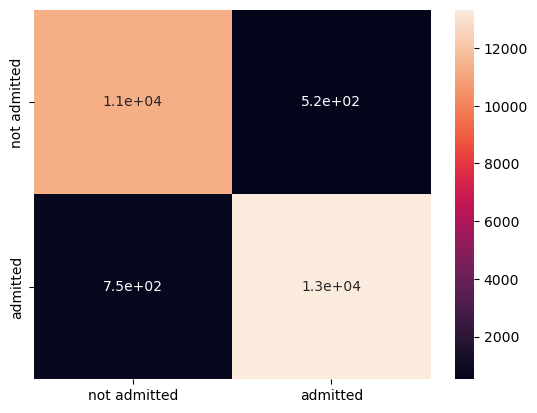

<Figure size 500x500 with 0 Axes>

In [55]:
#Rasio 80:20
conf_matrix_xgb_2 = confusion_matrix(y_test_2, pred_xgb_2)
sns.heatmap(conf_matrix_xgb_2, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [56]:
#calculating confusion matrix
TP = conf_matrix_xgb_2[1, 1]
FP = conf_matrix_xgb_2[0, 1]
TN = conf_matrix_xgb_2[0, 0]
FN = conf_matrix_xgb_2[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

#print confusion matrix's value
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 13329
FP: 518
TN: 11303
FN: 748
Accuracy: 0.951115916286972
Precision: 0.962591174983751
Recall: 0.9468636783405555
F1 Score: 0.9546626557799743


In [57]:
err_train_xgb_2 = np.mean(y_train_2 != model_xgb_2.predict(scaled_X_train_2))
err_test_xgb_2 = np.mean(y_test_2 != model_xgb_2.predict(scaled_X_test_2))

print('Kesalahan pada data training: ', err_train_xgb_2)
print('Kesalahan pada data testing: ', err_test_xgb_2)

Kesalahan pada data training:  0.03918369711069708
Kesalahan pada data testing:  0.048884083713028034


### SVM

In [58]:
model_svm_2 = SVC(random_state =2)
model_svm_2.fit(scaled_X_train_2,y_train_2)

SVC(random_state=2)

In [59]:
pred_svm_2 = model_svm_2.predict(scaled_X_test_2)
accuracy_score(y_test_2,pred_svm_2)

0.9386052977063866

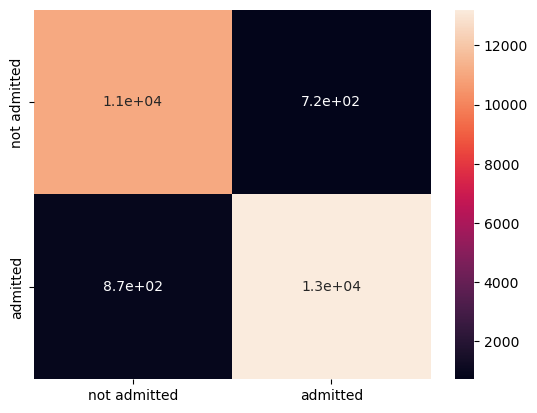

<Figure size 500x500 with 0 Axes>

In [60]:
#Rasio 80:20
conf_matrix_svm_2 = confusion_matrix(y_test_2, pred_svm_2)
sns.heatmap(conf_matrix_svm_2, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [61]:
#calculating confusion matrix
TP = conf_matrix_svm_2[1, 1]
FP = conf_matrix_svm_2[0, 1]
TN = conf_matrix_svm_2[0, 0]
FN = conf_matrix_svm_2[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

#print confusion matrix's value
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 13205
FP: 718
TN: 11103
FN: 872
Accuracy: 0.9386052977063866
Precision: 0.9484306543130072
Recall: 0.9380549833061022
F1 Score: 0.9432142857142857


In [62]:
err_train_svm_2 = np.mean(y_train_2 != model_svm_2.predict(scaled_X_train_2))
err_test_svm_2 = np.mean(y_test_2 != model_svm_2.predict(scaled_X_test_2))

print('Kesalahan pada data training: ', err_train_svm_2)
print('Kesalahan pada data testing: ', err_test_svm_2)

Kesalahan pada data training:  0.057370956375676956
Kesalahan pada data testing:  0.06139470229361341


### Random Forest

In [63]:
model_rf_2 = RandomForestClassifier(random_state =2)
model_rf_2.fit(scaled_X_train_2,y_train_2)

RandomForestClassifier(random_state=2)

In [64]:
pred_rf_2 = model_rf_2.predict(scaled_X_test_2)
accuracy_score(y_test_2,pred_rf_2)

0.9494941694339332

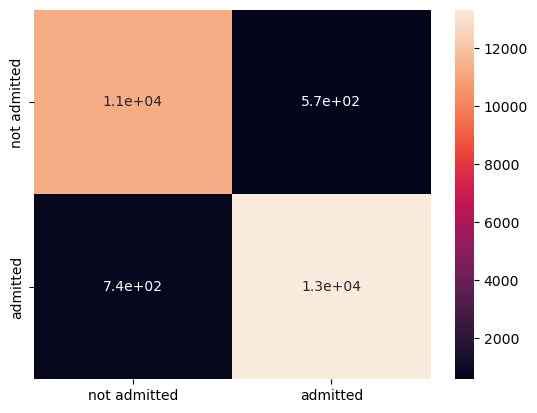

<Figure size 500x500 with 0 Axes>

In [65]:
#Rasio 80:20
conf_matrix_rf_2 = confusion_matrix(y_test_2, pred_rf_2)
sns.heatmap(conf_matrix_rf_2, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [66]:
#calculating confusion matrix
TP = conf_matrix_rf_2[1, 1]
FP = conf_matrix_rf_2[0, 1]
TN = conf_matrix_rf_2[0, 0]
FN = conf_matrix_rf_2[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

#print confusion matrix's value
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 13338
FP: 569
TN: 11252
FN: 739
Accuracy: 0.9494941694339332
Precision: 0.9590853527000791
Recall: 0.9475030191091852
F1 Score: 0.9532590051457976


In [67]:
err_train_rf_2 = np.mean(y_train_2 != model_rf_2.predict(scaled_X_train_2))
err_test_rf_2  = np.mean(y_test_2 != model_rf_2.predict(scaled_X_test_2))

print('Kesalahan pada data training: ', err_train_rf_2)
print('Kesalahan pada data testing: ', err_test_rf_2)

Kesalahan pada data training:  2.8960603925127186e-05
Kesalahan pada data testing:  0.050505830566066875


## Rasio 70:30

In [68]:
#Train-Test Split
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
#Scaling fitur dengan metode pipeline, dan scaler standar
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train_3 = pipeline.fit_transform(X_train_3)
scaled_X_test_3 = pipeline.transform(X_test_3)

In [70]:
print("Jumlah data training:", len(X_train_3))
print("Jumlah data testing:", len(X_test_3))

Jumlah data training: 90640
Jumlah data testing: 38847


### XGBoost

In [71]:
model_xgb_3 = XGBClassifier(random_state =2)
model_xgb_3.fit(scaled_X_train_3,y_train_3)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [72]:
pred_xgb_3 = model_xgb_3.predict(scaled_X_test_3)
accuracy_score(y_test_3,pred_xgb_3)

0.9481298427162973

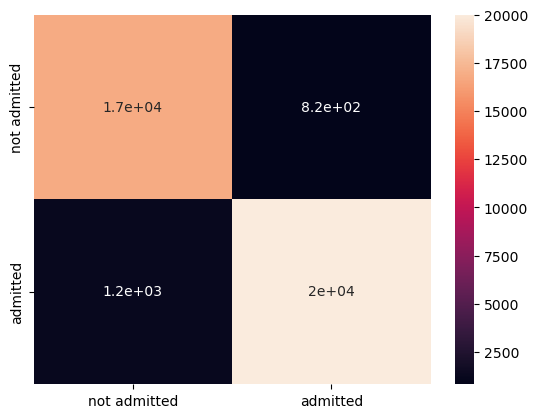

<Figure size 500x500 with 0 Axes>

In [73]:
#Rasio 70:30
conf_matrix_xgb_3 = confusion_matrix(y_test_3, pred_xgb_3)
sns.heatmap(conf_matrix_xgb_3, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [74]:
#calculating confusion matrix
TP = conf_matrix_xgb_3[1, 1]
FP = conf_matrix_xgb_3[0, 1]
TN = conf_matrix_xgb_3[0, 0]
FN = conf_matrix_xgb_3[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

#print confusion matrix's value
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 20012
FP: 819
TN: 16820
FN: 1196
Accuracy: 0.9481298427162973
Precision: 0.960683596562815
Recall: 0.9436061863447756
F1 Score: 0.9520683175146886


In [76]:
err_train_xgb_3 = np.mean(y_train_3 != model_xgb_3.predict(scaled_X_train_3))
err_test_xgb_3  = np.mean(y_test_3  != model_xgb_3.predict(scaled_X_test_3))

print('Kesalahan pada data training: ', err_train_xgb_3)
print('Kesalahan pada data testing: ', err_test_xgb_3)

Kesalahan pada data training:  0.03993821712268314
Kesalahan pada data testing:  0.05187015728370273


### SVM

In [77]:
model_svm_3 = SVC(random_state =2)
model_svm_3.fit(scaled_X_train_3,y_train_3)

SVC(random_state=2)

In [78]:
pred_svm_3 = model_svm_3.predict(scaled_X_test_3)
accuracy_score(y_test_3,pred_svm_3)

0.938116199449121

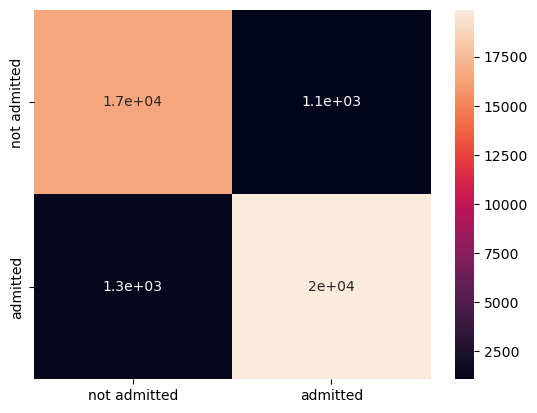

<Figure size 500x500 with 0 Axes>

In [79]:
#Rasio 70:30
conf_matrix_svm_3 = confusion_matrix(y_test_3, pred_svm_3)
sns.heatmap(conf_matrix_svm_3, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [80]:
#calculating confusion matrix
TP = conf_matrix_svm_3[1, 1]
FP = conf_matrix_svm_3[0, 1]
TN = conf_matrix_svm_3[0, 0]
FN = conf_matrix_svm_3[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

#print confusion matrix's value
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 19888
FP: 1084
TN: 16555
FN: 1320
Accuracy: 0.938116199449121
Precision: 0.9483120350944116
Recall: 0.9377593360995851
F1 Score: 0.9430061640587957


In [82]:
err_train_svm_3 = np.mean(y_train_3 != model_svm_3.predict(scaled_X_train_3))
err_test_svm_3  = np.mean(y_test_3  != model_svm_3.predict(scaled_X_test_3))

print('Kesalahan pada data training: ', err_train_svm_3)
print('Kesalahan pada data testing: ', err_test_svm_3)

Kesalahan pada data training:  0.058164165931156225
Kesalahan pada data testing:  0.06188380055087909


### Random Forest

In [83]:
model_rf_3 = RandomForestClassifier(random_state =2)
model_rf_3.fit(scaled_X_train_3,y_train_3)

RandomForestClassifier(random_state=2)

In [84]:
pred_rf_3 = model_rf_3.predict(scaled_X_test_3)
accuracy_score(y_test_3,pred_rf_3)

0.948799135068345

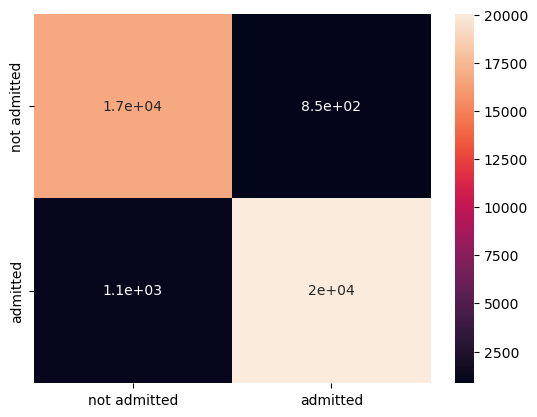

<Figure size 500x500 with 0 Axes>

In [85]:
#Rasio 70:30
conf_matrix_rf_3 = confusion_matrix(y_test_3, pred_rf_3)
sns.heatmap(conf_matrix_rf_3, annot=True, xticklabels=['not admitted', 'admitted'], yticklabels=['not admitted', 'admitted'])
plt.figure(figsize=(5,5))
plt.show()

In [86]:
#calculating confusion matrix
TP = conf_matrix_rf_3[1, 1]
FP = conf_matrix_rf_3[0, 1]
TN = conf_matrix_rf_3[0, 0]
FN = conf_matrix_rf_3[1, 0]

print('TP:', TP)
print('FP:', FP)
print('TN:', TN)
print('FN:', FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

#print confusion matrix's value
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

TP: 20067
FP: 848
TN: 16791
FN: 1141
Accuracy: 0.948799135068345
Precision: 0.9594549366483385
Recall: 0.9461995473406262
F1 Score: 0.9527811409443772


In [87]:
err_train_rf_3 = np.mean(y_train_3 != model_rf_3.predict(scaled_X_train_3))
err_test_rf_3  = np.mean(y_test_3  != model_rf_3.predict(scaled_X_test_3))

print('Kesalahan pada data training: ', err_train_rf_3)
print('Kesalahan pada data testing: ', err_test_rf_3)

Kesalahan pada data training:  0.0
Kesalahan pada data testing:  0.05120086493165495


## All Prediction

In [88]:
# Rasio 90:10
print("XGBOOST :", accuracy_score(y_test_1,pred_xgb_1))
print("SVM :", accuracy_score(y_test_1,pred_svm_1))
print("Random Forest :", accuracy_score(y_test_1,pred_rf_1))

XGBOOST : 0.9497258475557958
SVM : 0.9406131747625299
Random Forest : 0.9508842381651093


In [89]:
# Rasio 80:20
print("XGBOOST :", accuracy_score(y_test_2,pred_xgb_2))
print("SVM :", accuracy_score(y_test_2,pred_svm_2))
print("Random Forest :", accuracy_score(y_test_2,pred_rf_2))

XGBOOST : 0.951115916286972
SVM : 0.9386052977063866
Random Forest : 0.9494941694339332


In [90]:
# Rasio 70:30
print("XGBOOST :", accuracy_score(y_test_3,pred_xgb_3))
print("SVM :", accuracy_score(y_test_3,pred_svm_3))
print("Random Forest :", accuracy_score(y_test_3,pred_rf_3))

XGBOOST : 0.9481298427162973
SVM : 0.938116199449121
Random Forest : 0.948799135068345


From the results above, it can be seen that the best model is XGBOOST with the highest accuracy of 95.1% with a ratio of 80:20. In addition, because the precision and recall values are also quite high, this model is so good that no resampling is needed.